In [5]:
import sys
import copy
import emcee
import corner
import numpy as np
import matplotlib.pyplot as plt
from mods import prep, plotter
from scipy import optimize
%matplotlib inline
%load_ext autoreload

sys.path.append('./ligbind/')
import ligbind

In [2]:
def wymsol(var,parms,rtot,ltot):
    
    k11 = parm[0]
    k21 = parm[1]
    k22 = parm[2]
    l20 = parm[3]
    
    (L, M, MM, ML, MML, MMLL) = var
    
    eq1 = M + 2*MM + ML + 2*MML + 2*MMLL - rtot
    eq2 = L + ML + MML + 2*MMLL - ltot
    eq3 = l20 * M**2 - MM
    eq4 = k11 * L * M - ML
    eq5 = l20 * k21 * M**2 * L - MML
    eq6 = l20 * k21 * k22 * M**2 * L**2 - MMLL
    
    return np.array([eq1,eq2,eq3,eq4,eq5,eq6])

In [121]:
guess = (1000.,1000.,1000.,1000.,1000.,1000.)

In [4]:
parm = np.array([3.914,2.951,0.1136,313.9])


In [6]:
ligser = ligbind.helpers.dilser()

In [7]:
ligser

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [188]:
def frax(res):
    L = res[:,0]
    M = res[:,1]
    MM = res[:,2]
    ML = res[:,3]
    MML = res[:,4]
    MMLL = res[:,5]
    
    Mfree = M + 2*MM
    
    Mtot = M + ML + 2*MM + 2*MML + 2*MMLL
    
    Ltot = L + ML + MML + 2*MMLL
    
    Mbound = ML + 2*MML + 2*MMLL
    
    Lbound = ML + MML + 2*MMLL
    
    Lfree_check = Ltot - Lbound
    
    Mfree_check = Mtot - Mbound
    
    Monomer = M + ML
    
    Dimer = 2*MM + 2*MML + 2*MMLL #quantified as monomer, i.e., [MM] = 2[M]
    
    Monfrac = Monomer/Mtot
    
    Dimfrac = Dimer/Mtot
    
    Mon_bfrac = ML/Monomer
    
    Dim_bfrac = (MML + 2*MMLL)/Dimer
    
    Bfrac = Lbound/Mtot
    
    
    return np.array([L,M,MM,ML,MML,MMLL,Bfrac,Monfrac,Dimfrac,Mon_bfrac,Dim_bfrac,Mtot])

In [189]:
colnames = ['L','M','MM','ML','MML','MMLL','Bfrac','Monfrac','Dimfrac','Mon_bfrac','Dim_bfrac','Mtot']

In [190]:
rtot = np.array([1e-4,1e-3,1e-2,1e-1,1e0])

In [191]:
rtot

array([  1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
         1.00000000e-01,   1.00000000e+00])

In [192]:
res_mult = np.array([[optimize.root(wymsol,guess,args=(parm,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot])

In [193]:
res_mult

array([[[  9.99623789e-04,   9.40611373e-05,   2.77722948e-06,
           3.68016787e-07,   8.19252093e-09,   9.30320249e-13],
        [  1.99925036e-03,   9.37198685e-05,   2.75711358e-06,
           7.33364149e-07,   1.62663851e-08,   3.69433747e-12],
        [  3.99851174e-03,   9.30446209e-05,   2.71752693e-06,
           1.45616460e-06,   3.20657529e-08,   1.45652569e-11],
        [  7.99706660e-03,   9.17225769e-05,   2.64085047e-06,
           2.87096423e-06,   6.23223374e-08,   5.66177723e-11],
        [  1.59942985e-02,   8.91869093e-05,   2.49685628e-06,
           5.58325074e-06,   1.17849556e-07,   2.14127022e-10],
        [  3.19892057e-02,   8.45102827e-05,   2.24187000e-06,
           1.05811734e-05,   2.11632855e-07,   7.69068242e-10],
        [  6.39804967e-02,   7.64781116e-05,   1.83597020e-06,
           1.91516230e-05,   3.46643008e-07,   2.51946531e-09],
        [  1.27967321e-01,   6.42406900e-05,   1.29542332e-06,
           3.21758550e-05,   4.89192733e-07,   7

In [194]:
fraxres = [frax(i) for i in res_mult]

In [196]:
for i in res_mult:
    plt.loglog(ligser,i[:,8],'.')

IndexError: index 8 is out of bounds for axis 1 with size 6

In [39]:
ligser.shape

(18,)

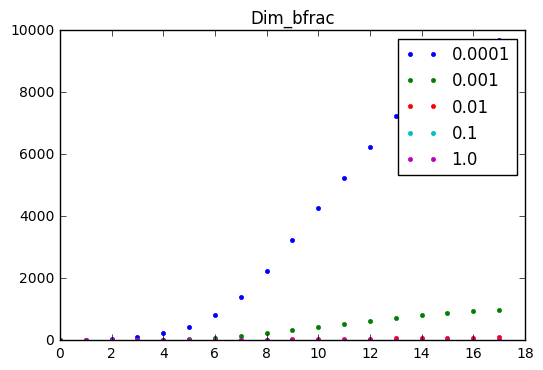

In [273]:
ind = 10
for i,j in enumerate(fraxres):
    plt.plot((j[ind]/j[11]),'.',label=rtot[i])
    plt.legend()
    plt.title(colnames[ind])


In [ ]:
plt.plot

In [94]:
import pandas as pd

In [98]:
pd.DataFrame(res_mult[5])

,0,1,2,3,4,5
0,0.000389,0.039099,0.479870,0.000060,0.000551,2.437007e-08
1,0.000779,0.039076,0.479301,0.000119,0.001102,9.748945e-08
2,0.001560,0.039030,0.478165,0.000238,0.002201,3.900306e-07
3,0.003128,0.038937,0.475899,0.000477,0.004392,1.560693e-06
4,0.006287,0.038752,0.471394,0.000954,0.008746,6.247155e-06
5,0.012704,0.038384,0.462491,0.001909,0.017338,2.502067e-05
6,0.025925,0.037656,0.445108,0.003821,0.034053,1.002902e-04
7,0.053947,0.036231,0.412058,0.007650,0.065599,4.020143e-04
8,0.116365,0.033527,0.352838,0.015270,0.121162,1.601646e-03
9,0.265637,0.028800,0.260368,0.029944,0.204101,6.159029e-03


In [231]:
for i,j in enumerate(fraxres):
    print(str(i), j)
    

0 [[  9.99623789e-04   1.99925036e-03   3.99851174e-03   7.99706660e-03
    1.59942985e-02   3.19892057e-02   6.39804967e-02   1.27967321e-01
    2.55950683e-01   5.11933890e-01   1.02392037e+00   2.04791133e+00
    4.09590600e+00   8.19190309e+00   1.63839016e+01   3.27679008e+01
    6.55359004e+01   1.31071900e+02]
 [  9.40611373e-05   9.37198685e-05   9.30446209e-05   9.17225769e-05
    8.91869093e-05   8.45102827e-05   7.64781116e-05   6.42406900e-05
    4.86367494e-05   3.27110225e-05   1.97555787e-05   1.10205185e-05
    5.84792910e-06   3.01628376e-06   1.53231740e-06   7.72347077e-07
    3.87739194e-07   1.94276428e-07]
 [  2.77722948e-06   2.75711358e-06   2.71752693e-06   2.64085047e-06
    2.49685628e-06   2.24187000e-06   1.83597020e-06   1.29542332e-06
    7.42540931e-07   3.35876450e-07   1.22509799e-07   3.81237290e-08
    1.07348385e-08   2.85585207e-09   7.37036134e-10   1.87247630e-10
    4.71922541e-11   1.12998467e-11]
 [  3.68016787e-07   7.33364149e-07   1.4561646

In [227]:
thing

In [240]:
''.join(['1',' ','2'])

'1 2'

In [304]:
parm4 = np.array([2,6,8.,109.])

In [305]:
res_mult4 = np.array([[optimize.root(wymsol,guess,args=(parm4,j,i),method='lm',options={'factor':0.1}).x for i in ligser] for j in rtot])

In [293]:
fraxres1 = [frax(i) for i in res_mult]

In [300]:
fraxres2 = [frax(i) for i in res_mult2]

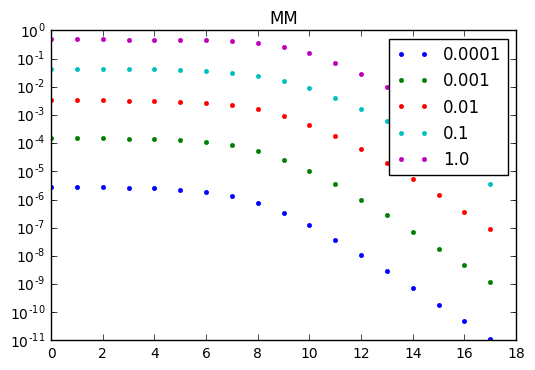

In [301]:
ind = 2
for i,j in enumerate(fraxres1):
    plt.semilogy((j[ind]),'.',label=rtot[i])
    plt.legend()
    plt.title(colnames[ind])

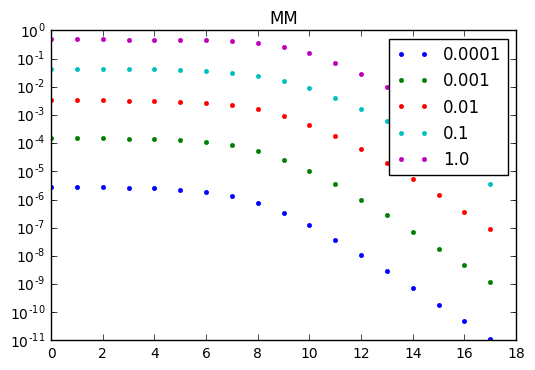

In [303]:
ind = 2
for i,j in enumerate(fraxres2):
    plt.semilogy((j[ind]),'.',label=rtot[i])
    plt.legend()
    plt.title(colnames[ind])

In [307]:
res_mult[0]

array([[  9.99623789e-04,   9.40611373e-05,   2.77722948e-06,
          3.68016787e-07,   8.19252093e-09,   9.30320249e-13],
       [  1.99925036e-03,   9.37198685e-05,   2.75711358e-06,
          7.33364149e-07,   1.62663851e-08,   3.69433747e-12],
       [  3.99851174e-03,   9.30446209e-05,   2.71752693e-06,
          1.45616460e-06,   3.20657529e-08,   1.45652569e-11],
       [  7.99706660e-03,   9.17225769e-05,   2.64085047e-06,
          2.87096423e-06,   6.23223374e-08,   5.66177723e-11],
       [  1.59942985e-02,   8.91869093e-05,   2.49685628e-06,
          5.58325074e-06,   1.17849556e-07,   2.14127022e-10],
       [  3.19892057e-02,   8.45102827e-05,   2.24187000e-06,
          1.05811734e-05,   2.11632855e-07,   7.69068242e-10],
       [  6.39804967e-02,   7.64781116e-05,   1.83597020e-06,
          1.91516230e-05,   3.46643008e-07,   2.51946531e-09],
       [  1.27967321e-01,   6.42406900e-05,   1.29542332e-06,
          3.21758550e-05,   4.89192733e-07,   7.11143763e-09],


In [308]:
res_mult2[0]

array([[  9.99623789e-04,   9.40611373e-05,   2.77722948e-06,
          3.68016787e-07,   8.19252093e-09,   9.30320249e-13],
       [  1.99925036e-03,   9.37198685e-05,   2.75711358e-06,
          7.33364149e-07,   1.62663851e-08,   3.69433747e-12],
       [  3.99851174e-03,   9.30446209e-05,   2.71752693e-06,
          1.45616460e-06,   3.20657529e-08,   1.45652569e-11],
       [  7.99706660e-03,   9.17225769e-05,   2.64085047e-06,
          2.87096423e-06,   6.23223374e-08,   5.66177723e-11],
       [  1.59942985e-02,   8.91869093e-05,   2.49685628e-06,
          5.58325074e-06,   1.17849556e-07,   2.14127022e-10],
       [  3.19892057e-02,   8.45102827e-05,   2.24187000e-06,
          1.05811734e-05,   2.11632855e-07,   7.69068242e-10],
       [  6.39804967e-02,   7.64781116e-05,   1.83597020e-06,
          1.91516230e-05,   3.46643008e-07,   2.51946531e-09],
       [  1.27967321e-01,   6.42406900e-05,   1.29542332e-06,
          3.21758550e-05,   4.89192733e-07,   7.11143763e-09],
